In [16]:
import time

# print(f'Notebook First Created: {time.asctime()}') #commented...don't run code agin

Notebook Last Updated: Sat Jan 20 11:48:22 2024


In [608]:
import time

print(f'Notebook Last Updated: {time.asctime()}')

Notebook Last Updated: Sun Jan 21 06:48:57 2024


# Heart Attack Prediction AI 🤖


**Introduction:**

- **Objective 🎯:** Develop an AI system for early heart attack detection, a crucial component of our larger Heart Attack Detection and Assistance System.

- **Technology 💻:** Leveraging scikit-learn (sklearn) for machine learning model development.

- **Process 🔄:**
  1. **Data Collection 📊:** Gather relevant data sources for training and testing.
  
  2. **Data Cleaning 🧹:** Prepare the dataset by handling missing values, outliers, and ensuring data quality.

  3. **Exploratory Data Analysis (EDA) 📊:** Gain insights into the cleaned dataset, understanding its nuances and patterns.

  4. **Feature Engineering 🛠️:** Create new informative features or transform existing ones to enhance model performance.

  5. **Model Building 🛠️:** Utilize various machine learning algorithms to build predictive models.

  6. **Evaluation 📈:** Rigorously assess model performance using diverse metrics.

  7. **Model Selection 🎉:** Identify the most effective model for heart attack detection.

  8. **Hyperparameter Tuning ⚙️:** Refine chosen model for optimal performance.

  9. **Model-Driven EDA 🧠:** Utilize model insights to enhance understanding of the dataset.

  10. **Deployment 🚀:** Implement the trained model into a production environment for real-world application.

- **Integration 🔗:** Seamlessly integrate the developed AI system with the main project using the Hugging Face API.

In [310]:
#model save
import joblib


# data manipulation

import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate# table creation

# feature engineering 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# prospective model imports
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

# model metrics

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay 


#callibration

from sklearn.calibration import CalibratedClassifierCV


## Exploratory Data Analysis 


**EDA (Exploratory Data Analysis) Checklist:**

1. **Initial Data Exploration:**
   - Find head, tail, and a sample of the dataset for a quick overview. **Complete ✅**

2. **Data Cleaning:**
   - Remove NaN (Not a Number) values.
   - Eliminate duplicate data for improved accuracy. **Complete ✅**

3. **Outlier Detection:**
   - Utilize box plots for each parameter to identify and visualize outliers. **Complete ✅**

4. **Correlation Analysis:**
   - Construct a correlation matrix to understand relationships between different variables. **Complete ✅**

5. **Dataset Characteristics:**
   - Determine the size of the dataset.
   - Explore the shape of the dataset (rows, columns). **Complete ✅**

6. **Assumptions and Testing:**
   - Formulate assumptions about the model and its parameters.
   - Test assumptions through visualizations and statistical methods.**Complete ✅**

7. **Normalization:**
   - Normalize data if necessary for better model performance. **[Pending]**

8. **Additional Analysis (if needed):**
   - Perform statistical tests on relevant parameters.
   - Plot each parameter against others to explore relationships.
   - Plot each parameter against the target variable for insights. **Complete ✅**

9. **Documentation:**
   - Document findings, observations, and any decisions made during the EDA process.
   - Record insights that may influence model building and feature selection. **Complete ✅**

10. **Plotting:**
    - Generate visual representations (histograms, scatter plots, etc.) to aid in understanding the distribution of data.
    - Plot each parameter against others to explore relationships.
    - Plot each parameter against the target variable for insights. **Complete ✅**

11. **Review and Iterate:**
    - Review the EDA results and iterate if needed based on the insights gained. **Complete ✅**


   
*adapted from: Warmbein, Karen. “An EDA Checklist - DataSeries - Medium.” Medium, 14 Dec. 2021, medium.com/dataseries/an-eda-checklist-800beeaee555.*

In [447]:
df = pd.read_csv('dataset/heart.csv', index_col=0)
df.drop('SPO2', inplace = True, axis = 1)

In [448]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [449]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [450]:
# data doesn't have missing values therefore NaN removal is not necessary
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.5 KB


In [451]:
# there are a lot more men there are women, there are a lot more middle aged patients than there are youngsters or older patients (let's see if this holds true at the time of plotting)

df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [452]:
df.sample(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
254,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2,1
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2,1
55,52,1,1,134,201,0,1,158,0,0.8,2,1,2,1
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
98,43,1,2,130,315,0,1,162,0,1.9,2,1,2,1
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1


In [453]:
# checking the shape of the dataset
# dataset has 304 samples with 14 parameters each
df.shape


(303, 14)

In [454]:
#identification of duplicated rows
duplicate_rows_params=df[df.duplicated()]

In [459]:
duplicate_filtered_df = df[
    (df['age'] == duplicate_rows_params['age'].iloc[0]) &
    (df['sex'] == duplicate_rows_params['sex'].iloc[0]) &
    (df['cp'] == duplicate_rows_params['cp'].iloc[0]) &
    (df['trtbps'] == duplicate_rows_params['trtbps'].iloc[0]) &
    (df['chol'] == duplicate_rows_params['chol'].iloc[0]) &
    (df['fbs'] == duplicate_rows_params['fbs'].iloc[0]) &
    (df['restecg'] == duplicate_rows_params['restecg'].iloc[0]) &
    (df['thalachh'] == duplicate_rows_params['thalachh'].iloc[0]) &
    (df['oldpeak'] == duplicate_rows_params['oldpeak'].iloc[0]) &
    (df['slp'] == duplicate_rows_params['slp'].iloc[0]) &
    (df['caa'] == duplicate_rows_params['caa'].iloc[0]) &
    (df['thall'] == duplicate_rows_params['thall'].iloc[0]) &
    (df['exng'] == duplicate_rows_params['exng'].iloc[0]) &
    (df['output'] == duplicate_rows_params['output'].iloc[0])]


In [460]:
# we find that there are two rows which are duplicated 

duplicate_filtered_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [461]:
df.drop_duplicates(inplace = True)


In [462]:
len(df.output.value_counts())

2

Text(0.5, 1.0, 'Number of Individuals with and without Heart Attack')

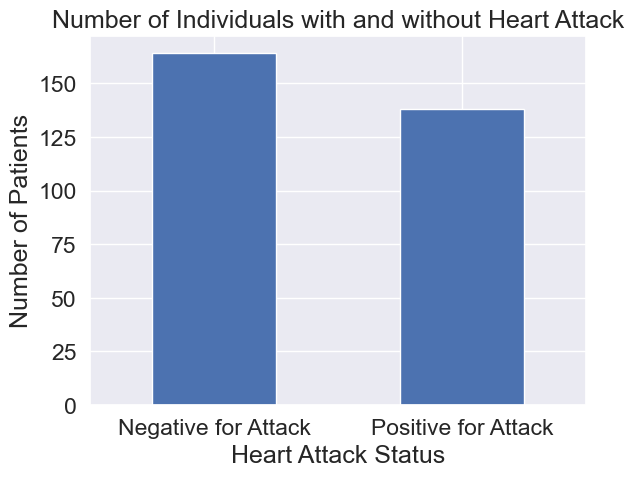

In [463]:
# dataset very balanced --> nearly equal samples of with and without heart disease which removes bias

df.output.value_counts().plot(kind = 'bar')

plt.xticks(range(len(df.output.value_counts())), ['Negative for Attack', 'Positive for Attack'], rotation = 360)
plt.ylabel('Number of Patients')
plt.xlabel('Heart Attack Status')
plt.title('Number of patients')
plt.title('Number of Individuals with and without Heart Attack')
# plt.savefig('visualisations/output_v_freq.jpeg') # COMMENTED TO REMOVE SAVE AT RUNTIME

Text(0.5, 1.0, 'Number of Individuals with and without Heart Attack by Gender')

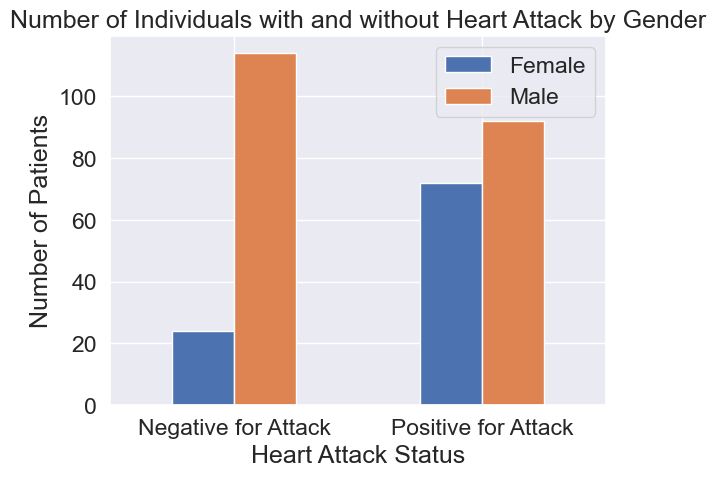

In [464]:
# there are a lot more males than there are females....in addition to this, the proportion of females that have heart disease is much higher...this may bias the results of our model

cross_tab = pd.crosstab(df.output, df.sex)
cross_tab.plot(kind='bar')
plt.legend(labels=['Female', 'Male'])
custom_ticks = range(len(cross_tab.columns))
plt.xticks(custom_ticks, ['Negative for Attack', 'Positive for Attack'], rotation = 360)
plt.ylabel('Number of Patients')
plt.xlabel('Heart Attack Status')
plt.title('Number of Individuals with and without Heart Attack by Gender')

# plt.savefig('visualisations/output_v_sex.jpeg') # COMMENTED TO REMOVE SAVE AT RUNTIME

In [465]:
def createAgeBins(min_size, max_size, bin_size=5, string_form=False):
    """
    Create age bins based on specified parameters.

    Parameters:
    - min_size (int): The minimum age to start creating bins.
    - max_size (int): The maximum age to include in the bins.
    - bin_size (int, optional): The size of each age bin. Default is 5.
    - string_form (bool, optional): If True, returns age bins as strings. Default is False.

    Returns:
    list: A list of lists representing age bins in the format [start_age, end_age].
          If string_form is True, returns age bins in the format "start_age - end_age".

    Example:
    >>> createAgeBins(20, 40, 10)
    [[20, 30], [31, 40]]

    If string_form is True:
    >>> createAgeBins(20, 40, 10, string_form=True)
    ['20-30', '31-40']

    Note:
    - The age bins are inclusive on both the lower end and the upper end
    - The function assumes that min_size and max_size are non-negative integers.
    """
    output = []
    min_size -= 1
    while min_size <= max_size:
        output.append([min_size + 1, min_size + bin_size])
        min_size += bin_size
    if string_form:
        return [f"{item[0]}-{item[1]}" for item in output]
    else:
        return output

# creating age boundaries
age_bins=createAgeBins(29, 77, 5)

In [466]:
target_distrib_age = []
for index, item in enumerate(age_bins):
    print(item)
    filtr_df = df[(df['age'] >= item[0]) & (df['age'] <=item[1])]
    target_distrib_age.append([filtr_df['output'].eq(1).sum(), filtr_df['output'].eq(0).sum()])

[29, 33]
[34, 38]
[39, 43]
[44, 48]
[49, 53]
[54, 58]
[59, 63]
[64, 68]
[69, 73]
[74, 78]


In [467]:
target_distrib_age


[[1, 0],
 [7, 3],
 [25, 8],
 [25, 13],
 [31, 14],
 [32, 39],
 [16, 37],
 [19, 19],
 [6, 4],
 [2, 1]]

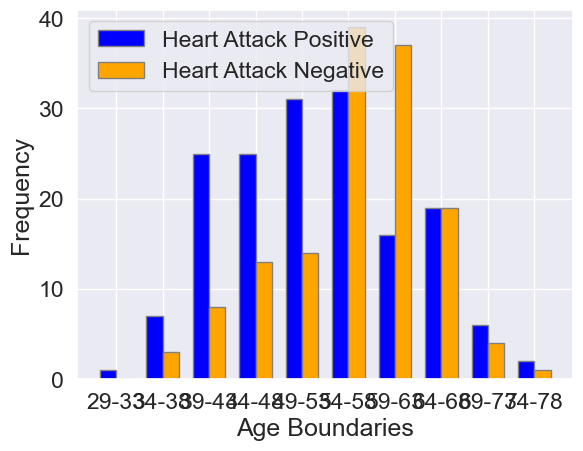

In [468]:
# the data is concentrated mostly around middle aged people with little to no representation of people of higher and lower ages

# plotting age boundaries and 
# Sample data for illustration
age_bins_string = createAgeBins(29, 77, 5, string_form=True)



# Width of each bar
bar_width = 0.35

# Set the positions for the bars on the x-axis
r1 = np.arange(len(age_bins_string))
r2 = [x + bar_width for x in r1]

# Plot the bars
plt.bar(r1, [item[0] for item in target_distrib_age], color='blue', width=bar_width, edgecolor='grey', label='Heart Attack Positive')
plt.bar(r2, [item[1] for item in target_distrib_age], color='orange', width=bar_width, edgecolor='grey', label='Heart Attack Negative')

# Add x-axis age_bins_string and labels
plt.xlabel('Age Boundaries')
plt.xticks([r + bar_width/2 for r in range(len(age_bins_string))], age_bins_string)

# Add y-axis label
plt.ylabel('Frequency')

# Add legend
plt.legend()


# plt.savefig('visualisations/output_v_age.jpeg') # commented to remove save at runtime


Text(0.5, 1.0, 'Number of Individuals with and without Heart Attack by Chest pain Type')

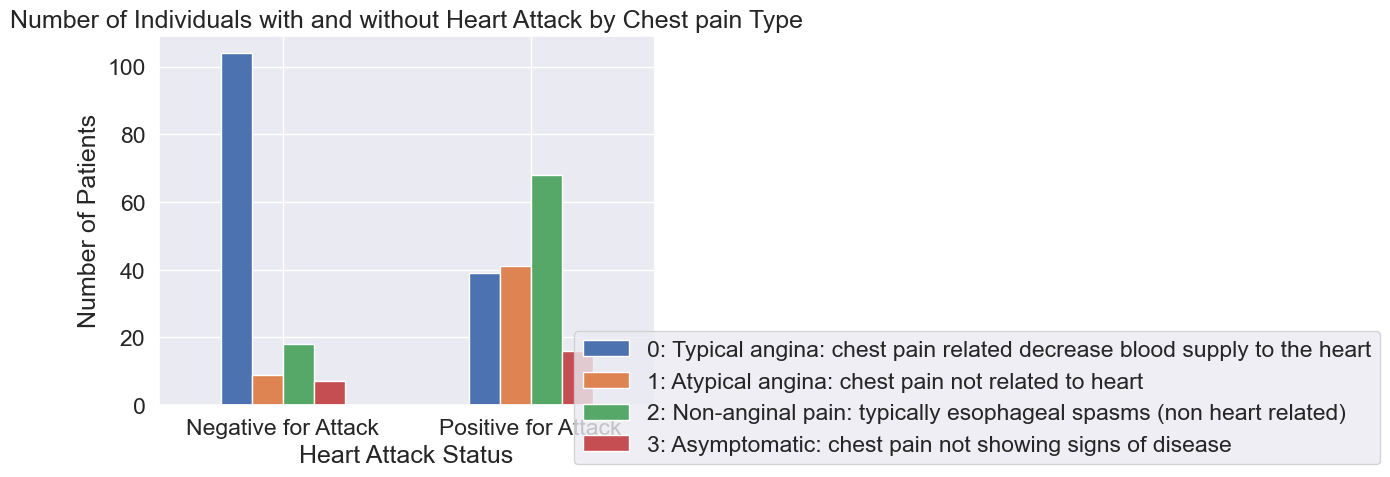

In [469]:
# chest pain related to the non-anginal pain seems to be having the highest proportion of patients positive for heart attack

cross_tab = pd.crosstab(df.output, df.cp)
cross_tab.plot(kind='bar')


plt.legend(labels=['0: Typical angina: chest pain related decrease blood supply to the heart', '1: Atypical angina: chest pain not related to heart','2: Non-anginal pain: typically esophageal spasms (non heart related)', '3: Asymptomatic: chest pain not showing signs of disease'], loc='center', bbox_to_anchor=(1.65, 0.02))

custom_ticks = range(len(cross_tab))
plt.xticks(custom_ticks, ['Negative for Attack', 'Positive for Attack'], rotation = 360)
plt.ylabel('Number of Patients')
plt.xlabel('Heart Attack Status')
plt.title('Number of Individuals with and without Heart Attack by Chest pain Type')

# plt.savefig('visualisations/output_v_cp.jpeg')# commented to remove save during run-time


Text(0.5, 0, 'Resting Blood Pressure (in mm Hg)')

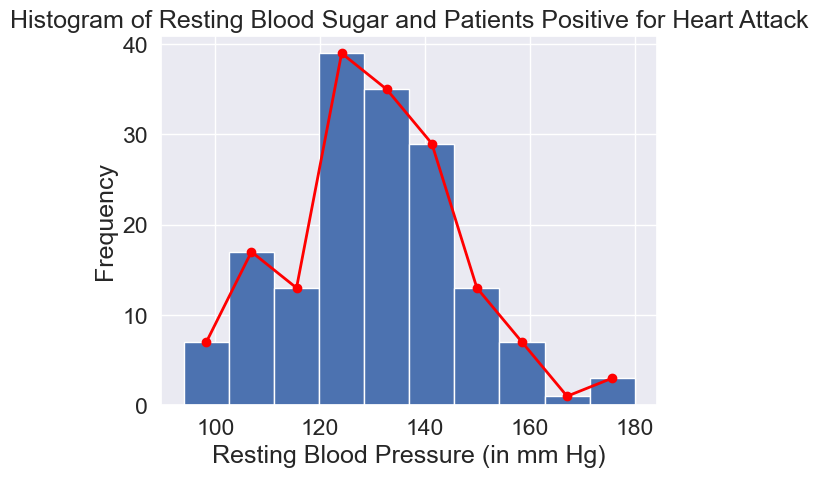

In [470]:
# histogram of people positive for heart attack and trtbps

#most testing positive for heart attack people have a trtbps of 140 - 150  

data_trtbps = df[(df['output'] == 1)].trtbps

data_trtbps.plot(kind = 'hist', bins =10)

hist, bins = np.histogram(data_trtbps, bins=10)

# Calculate bin widths and centers
bin_widths = np.diff(bins)
bin_centers = bins[:-1] + bin_widths / 2

# Plot the histogram as a line plot
plt.plot(bin_centers, hist, color='red', linewidth=2, marker = 'o')


plt.title('Histogram of Resting Blood Sugar and Patients Positive for Heart Attack')
plt.xlabel('Resting Blood Pressure (in mm Hg)')

# plt.savefig('visualisations/output_v_trtbps.jpeg') # commented to remove repeated at run time of notebook


Text(0.5, 0, 'Serum Cholestrol in mg/dl')

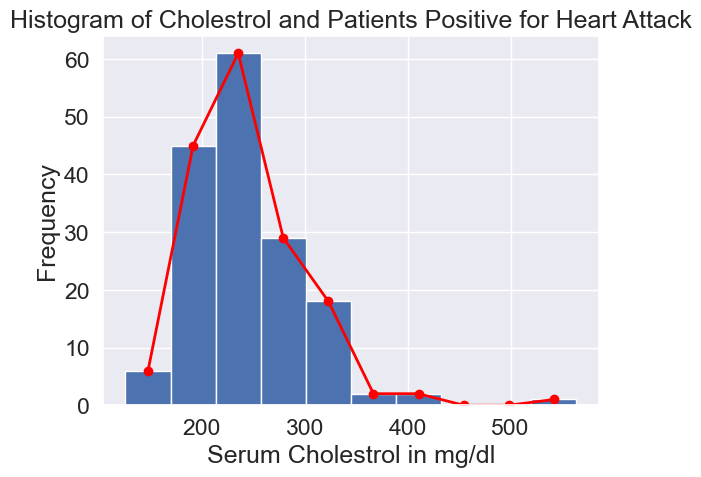

In [471]:
# # histogram of people positive for heart attack and chol

# most people positive for heart attack have cholestrol level of 200.....the hisotgram has a shift to the left

data_chol = df[(df['output'] == 1)].chol

data_chol.plot(kind = 'hist', bins =10)

hist, bins = np.histogram(data_chol, bins=10)

# Calculate bin widths and centers
bin_widths = np.diff(bins)
bin_centers = bins[:-1] + bin_widths / 2

# Plot the histogram as a line plot
plt.plot(bin_centers, hist, color='red', linewidth=2, marker = 'o')


plt.title('Histogram of Cholestrol and Patients Positive for Heart Attack')
plt.xlabel('Serum Cholestrol in mg/dl')

# plt.savefig('visualisations/output_v_chol.jpeg') # commented to remove repeated at run time of notebook


Text(0.5, 1.0, 'Number of Individuals with and without Heart Attack by Fasting Blood Sugar')

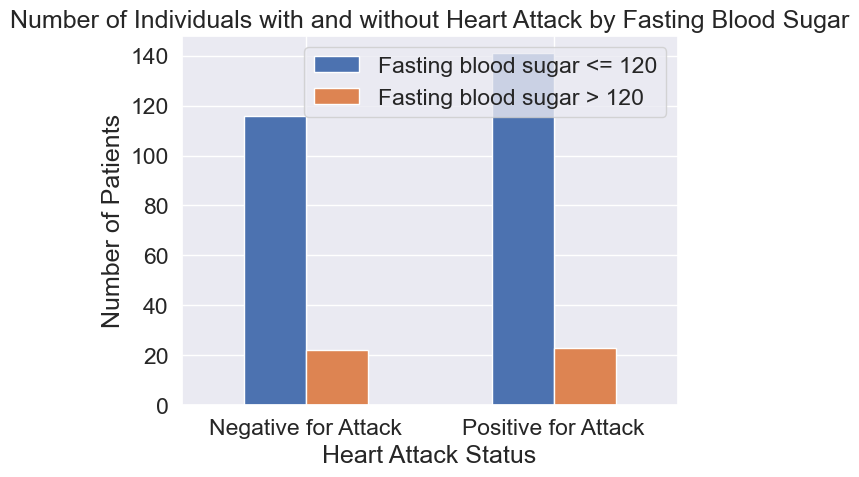

In [472]:
# to begin with there aren't a lot of samples with fbs more than 120, this being the said, there is an equal distribution between having heart disease and not having heart disease for fbs more than 120

# for fbs less than 120, one can say that there are more people with heart disease as a sample of the entire population...but the difference is not a lot

cross_tab = pd.crosstab(df.output, df.fbs)
cross_tab.plot(kind='bar')


plt.legend(labels=['Fasting blood sugar <= 120', 'Fasting blood sugar > 120'])

custom_ticks = range(len(cross_tab))
plt.xticks(custom_ticks, ['Negative for Attack', 'Positive for Attack'], rotation = 360)
plt.ylabel('Number of Patients')
plt.xlabel('Heart Attack Status')
plt.title('Number of Individuals with and without Heart Attack by Fasting Blood Sugar')

# plt.savefig('visualisations/output_v_fbs.jpeg')# commented to remove save during run-time


Text(0.5, 1.0, 'Number of Individuals with and without Heart Attack by Resting Electrocardiograph results')

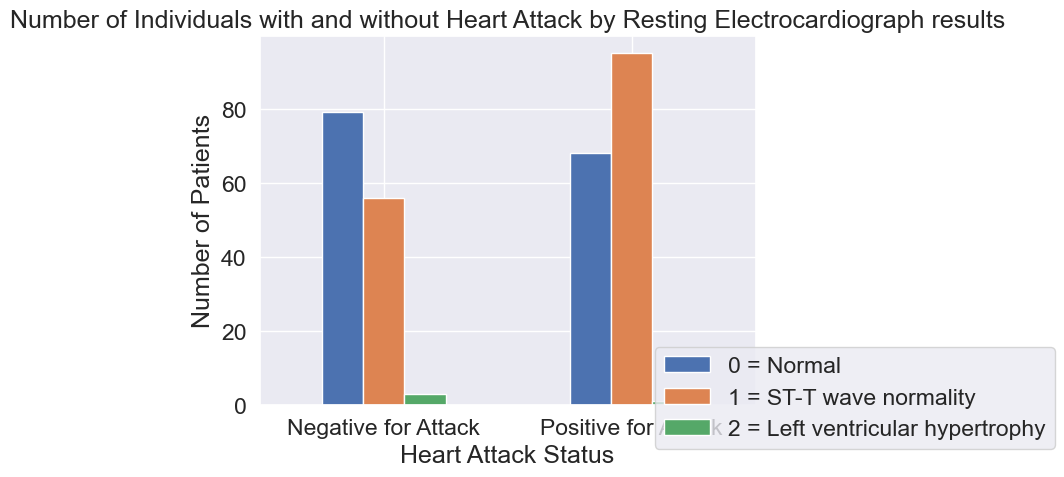

In [473]:

# one can see that the representatino of patients with restecg of type Left Ventricular hypertrophy is quite less to begin with, and those that are still there have a near equal distribution

# for type 1 restecg, one can clearly see the proportion of the patients with heart attack is much higher than those without 

# for type 0, this seems to be compeltely opposite with a lot more patients without heart attack and a lot less with heart attack
cross_tab = pd.crosstab(df.output, df.restecg)
cross_tab.plot(kind='bar')

plt.legend(labels=['0 = Normal', '1 = ST-T wave normality', '2 = Left ventricular hypertrophy'], loc='center', bbox_to_anchor=(1.2, 0.02))


custom_ticks = range(len(cross_tab))
plt.xticks(custom_ticks, ['Negative for Attack', 'Positive for Attack'], rotation = 360)
plt.ylabel('Number of Patients')
plt.xlabel('Heart Attack Status')
plt.title('Number of Individuals with and without Heart Attack by Resting Electrocardiograph results')

# plt.savefig('visualisations/output_v_restecg.jpeg')# commented to remove save during run-time

<Axes: title={'center': 'Heat Map of the DataFrame'}>

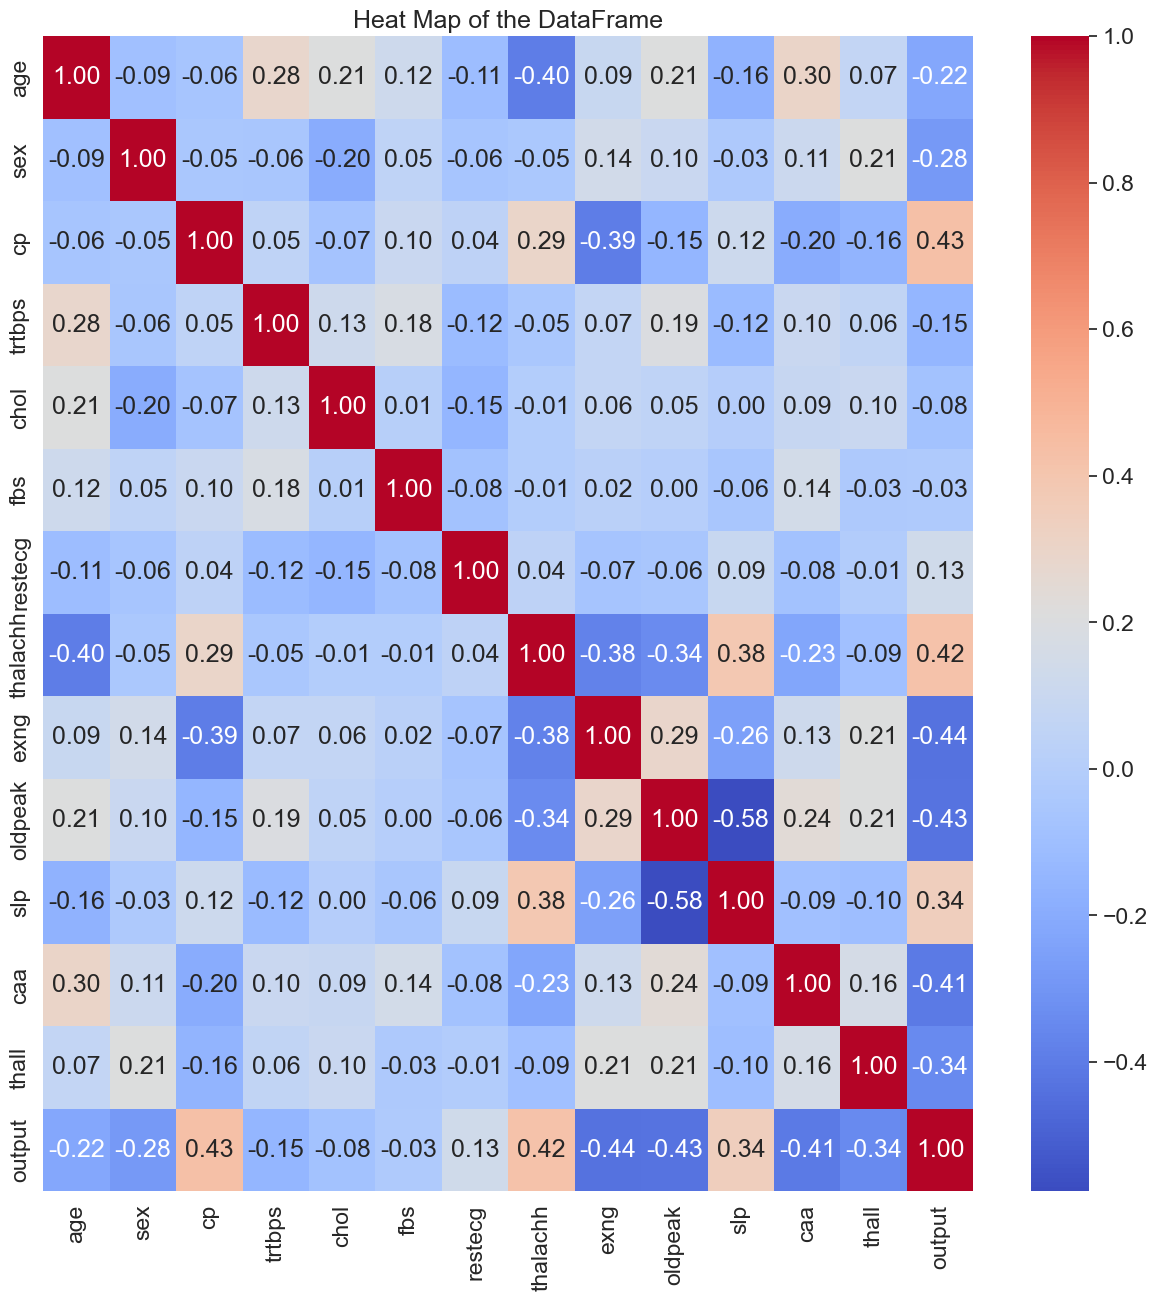

In [474]:
# plotting the correlation matrix

correlation_matrix = df.corr()
plt.figure(figsize = (15,15))
plt.title('Heat Map of the DataFrame')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.savefig('visualisations/corr_heatmap.jpeg') # commented to remove save at the time of runtime

In [475]:
for item in df:
    print(item, end=' ')
    print(len(np.unique(df[item])))

age 41
sex 2
cp 4
trtbps 49
chol 152
fbs 2
restecg 3
thalachh 91
exng 2
oldpeak 40
slp 3
caa 5
thall 4
output 2


In [476]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

cat_cols

['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']

In [477]:
con_cols

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

Text(0, 0.5, 'age for patients')

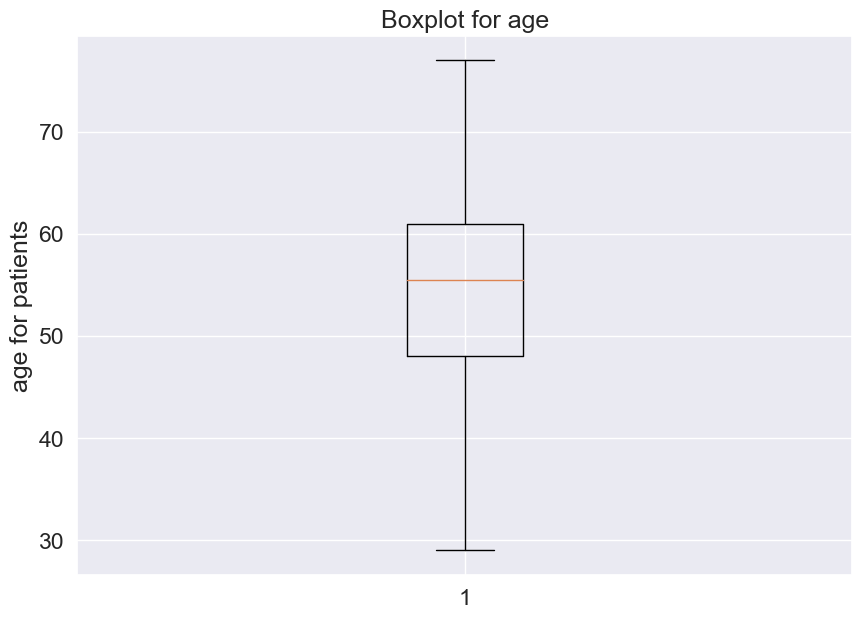

In [478]:
index = 0
plt.figure(figsize = (10,7))
plt.boxplot(df[con_cols[index]])
plt.title(f'Boxplot for {con_cols[index]}')
plt.xlabel("")
plt.ylabel(f"{con_cols[index]} for patients")
# plt.savefig(f'{con_cols[index]}_boxplot.jpeg')

Text(0, 0.5, 'trtbps for patients')

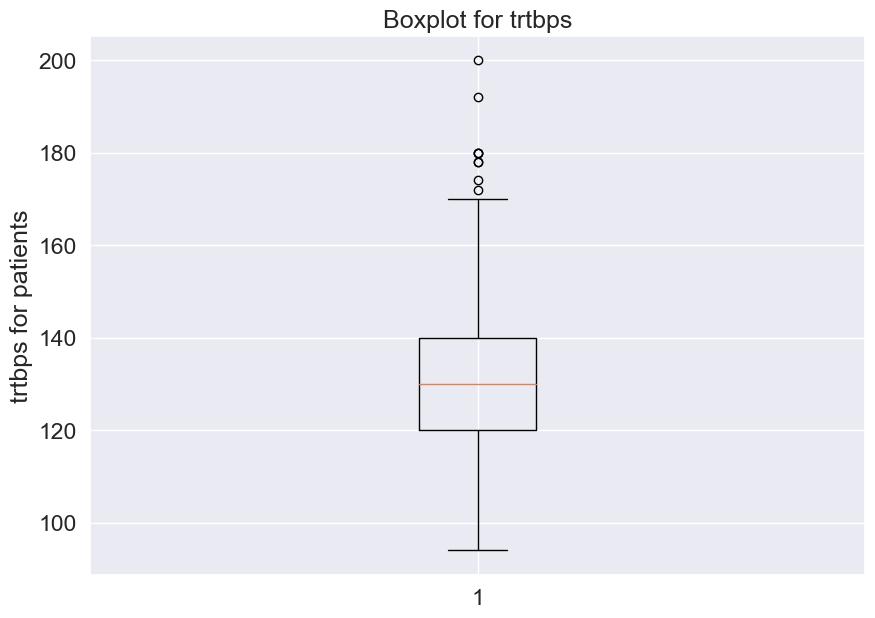

In [479]:
# all values of resting blood pressure seem within limit
index = 1
plt.figure(figsize = (10,7))
plt.boxplot(df[con_cols[index]])
plt.title(f'Boxplot for {con_cols[index]}')
plt.xlabel("")
plt.ylabel(f"{con_cols[index]} for patients")
# plt.savefig(f'{con_cols[index]}_boxplot.jpeg')

In [480]:
np.sort(df['trtbps'])[-4:]

array([180, 180, 192, 200])

Text(0, 0.5, 'chol for patients')

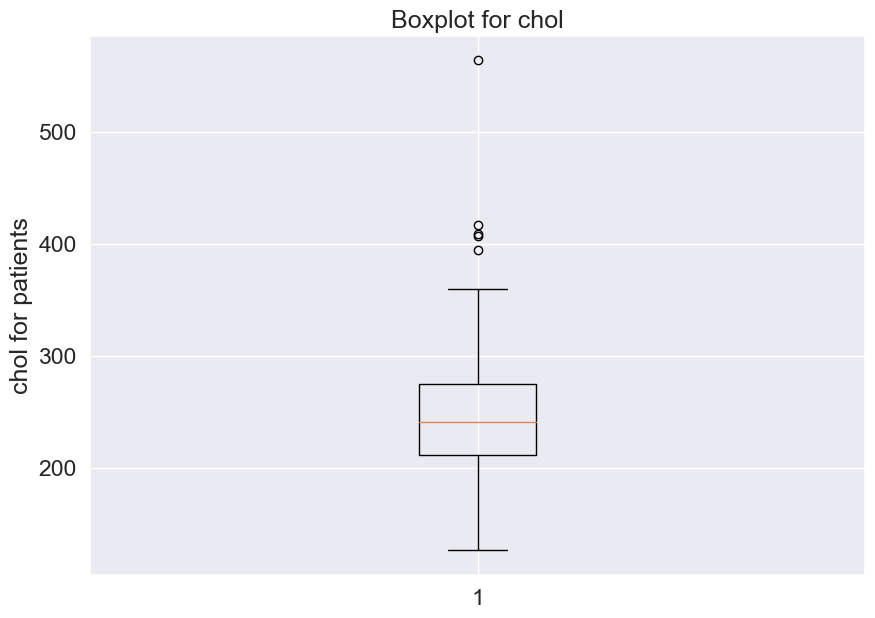

In [481]:
# cholestrol values are within the range - the maximum values are high, still feasible


index = 2
plt.figure(figsize = (10,7))
plt.boxplot(df[con_cols[index]])
plt.title(f'Boxplot for {con_cols[index]}')
plt.xlabel("")
plt.ylabel(f"{con_cols[index]} for patients")
# plt.savefig(f'visualisations/{con_cols[index]}_boxplot.jpeg')

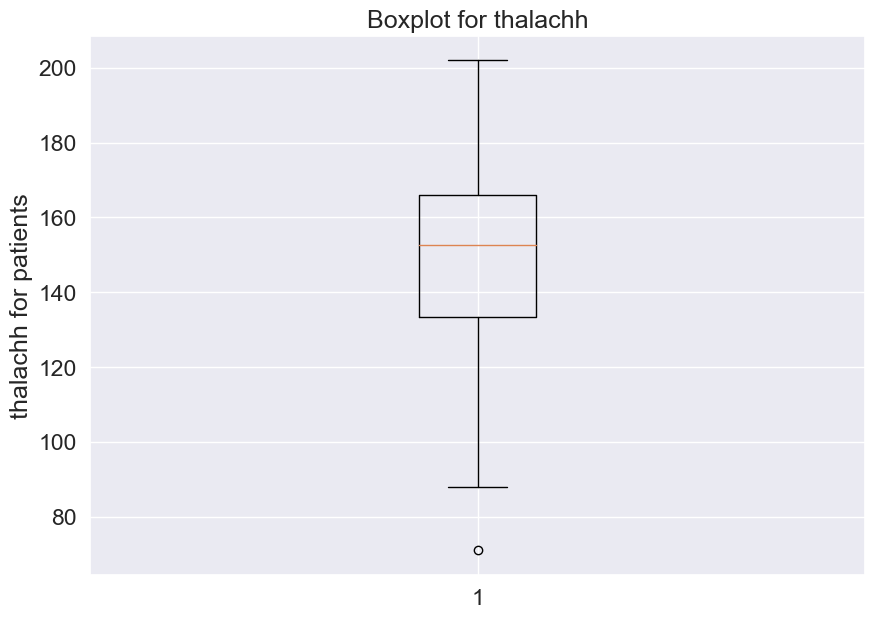

In [482]:
# maximum heart rate values are still too high however, they are within the boundaries of possibility


index = 3
plt.figure(figsize = (10,7))
plt.boxplot(df[con_cols[index]])
plt.title(f'Boxplot for {con_cols[index]}')
plt.xlabel("")
plt.ylabel(f"{con_cols[index]} for patients")
plt.savefig(f'visualisations/{con_cols[index]}_boxplot.jpeg')

In [483]:
# assumptions about the data --> the data has a mixture of categorical values and numerical variables ---> some of th variables would be taken at the time of onboarding, some of the variables would be measured constantly


# missing values and duplicated rows have been ac`counted for

# the number of samples in the dataset is quite low; can be improved


# all values are integers except for a values that is float; all values however are numerical 

# all values are reasonable and within a normal range

## Feature Engineering

- The feature engineering stage would be divided mainly into two sub-stages:
1. The first sub stage include the normalisation of the `con_cols`; this stage would also include deciding on which exact scaler we would be using: `MinMaxScalar()` or `StandardScalar()`
2. The second sub stage inclides using `pd.Dummies()`


In [484]:
df_mn = df
df_ss = df


df_mn = pd.get_dummies(df_mn, columns = cat_cols, drop_first=True) # good idea to drop first because the number of columns is reduced 

df_ss = pd.get_dummies(df_ss, columns = cat_cols, drop_first = True)
# This patter is continued here 


In [485]:
df_ss.columns #pd.dummies has been successfully completed

Index(['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output', 'sex_1',
       'exng_1', 'caa_1', 'caa_2', 'caa_3', 'caa_4', 'cp_1', 'cp_2', 'cp_3',
       'fbs_1', 'restecg_1', 'restecg_2', 'slp_1', 'slp_2', 'thall_1',
       'thall_2', 'thall_3'],
      dtype='object')

In [486]:
X_mn = df_mn.drop(['output'], axis = 1)
X_ss = df_ss.drop(['output'], axis = 1)

scaler_mn = MinMaxScaler()
scaler_ss = StandardScaler()

X_mn[con_cols] = scaler_mn.fit_transform(X_mn[con_cols])
X_ss[con_cols] = scaler_ss.fit_transform(X_ss[con_cols])

y_mn = df_mn['output']
y_ss = df_ss['output']

In [487]:
X_mn

,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,0.166667,0.339623,0.283105,0.885496,0.564516,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,0.250000,0.339623,0.178082,0.770992,0.225806,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.562500,0.245283,0.251142,0.816794,0.129032,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0.583333,0.245283,0.520548,0.702290,0.096774,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.433962,0.262557,0.396947,0.032258,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
299,0.333333,0.150943,0.315068,0.465649,0.193548,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
300,0.812500,0.471698,0.152968,0.534351,0.548387,1,0,0,1,0,...,0,0,1,1,0,1,0,0,0,1
301,0.583333,0.339623,0.011416,0.335878,0.193548,1,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1


In [488]:
X_ss

,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.949794,0.764066,-0.261285,0.018826,1.084022,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,-1.928548,-0.091401,0.067741,1.636979,2.118926,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0.285561,-0.661712,2.080602,0.587366,-0.382092,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.285561,0.478910,-0.106449,-1.161988,-0.727060,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
299,-1.042904,-1.232023,0.338703,-0.768384,0.135360,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
300,1.503322,0.707035,-1.035462,-0.374779,2.032684,1,0,0,1,0,...,0,0,1,1,0,1,0,0,0,1
301,0.285561,-0.091401,-2.235438,-1.511859,0.135360,1,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1


In [489]:
# creating a simple test to decide on the final version of teh scalar

np.random.seed(42)

X_mn_train, X_mn_test, y_mn_train, y_mn_test = train_test_split(X_mn, y_mn, test_size = 0.2)


X_ss_train, X_ss_test, y_ss_train, y_ss_test = train_test_split(X_ss, y_ss, test_size = 0.2)


In [490]:

for i in range(1, 5):
    np.random.seed(np.random.randint(0,100))
    model_1 = RandomForestClassifier()
    model_1.fit(X_ss_train, y_ss_train)
    model_1.score(X_ss_test, y_ss_test)
    print(f"StandardScaler was able to achieve with RandomForestClasifier(): {model_1.score(X_ss_test, y_ss_test)}")

    model_2 = RandomForestClassifier()
    model_2.fit(X_mn_train, y_mn_train)
    print(f"MinMaxScaler() was able to achieve with RandomForestClasifier(): {model_2.score(X_mn_test, y_mn_test)}")



# MinMaxScaler continously scores higher than StandardScaler therefore this would be our algorithm for choice for the scaling of the data in the final training phases

StandardScaler was able to achieve with RandomForestClasifier(): 0.8032786885245902
MinMaxScaler() was able to achieve with RandomForestClasifier(): 0.819672131147541
StandardScaler was able to achieve with RandomForestClasifier(): 0.7868852459016393
MinMaxScaler() was able to achieve with RandomForestClasifier(): 0.8360655737704918
StandardScaler was able to achieve with RandomForestClasifier(): 0.819672131147541
MinMaxScaler() was able to achieve with RandomForestClasifier(): 0.819672131147541
StandardScaler was able to achieve with RandomForestClasifier(): 0.7868852459016393
MinMaxScaler() was able to achieve with RandomForestClasifier(): 0.8688524590163934


In [491]:
X = X_mn
y = y_mn

In [492]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

print(f'''
1. The shape of X_train is {X_train.shape}
2. The shape of y_train is {y_train.shape}
3. The shape of X_test is {X_test.shape}
4. The shape of y_test is {y_test.shape}
      ''')


# the data has been split into trainig and testing successfully




1. The shape of X_train is (241, 22)
2. The shape of y_train is (241,)
3. The shape of X_test is (61, 22)
4. The shape of y_test is (61,)
      


![ML Model map](visualisations/skl_model_map.png)

In [493]:


# Put models in a dictionary
models = {
    'SGD Classifier': SGDClassifier(),
    'K Neighbors Classifier': KNeighborsClassifier(),
    'Support Vector Classifier (SVC)': SVC(),
    'Random Forest Regressor': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'Linear Support Vector Classifier': LinearSVC(),
    'Logistic Regression': LogisticRegression()
}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):

    model_scores = {}

    for name, model in models.items():

        np.random.seed(np.random.randint(1, 100))
        score_sum = 0
        for i in range(0, 5):
            model.fit(X_train, y_train)
            score_sum += model.score(X_test, y_test)
        model_scores[name] = score_sum/5
    return model_scores

model_scores = fit_and_score(models = models, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test)

# this is a preliminary test that doesn't include hyperparameters of the models...one can clearly identify that the models with the highest accuracy are LinearSVC, LogisticRegression and SGD Classifier...the rest of the evaluation process would be conducted on only these

model_scores

{'SGD Classifier': 0.7213114754098362,
 'K Neighbors Classifier': 0.8032786885245902,
 'Support Vector Classifier (SVC)': 0.7704918032786885,
 'Random Forest Regressor': 0.7704918032786885,
 'Naive Bayes': 0.7704918032786885,
 'Linear Support Vector Classifier': 0.8196721311475411,
 'Logistic Regression': 0.7868852459016393}

Text(0.5, 1.0, 'Performance of multiple different classification models (acc measured)')

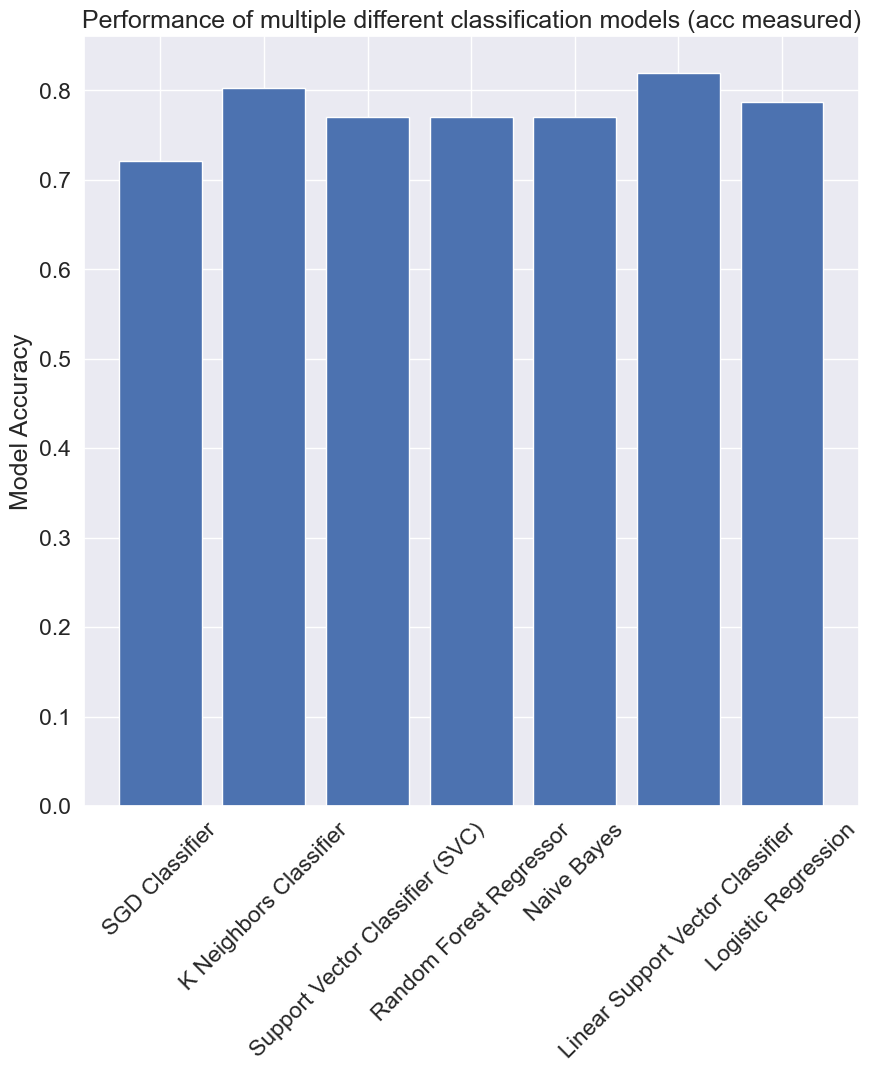

In [494]:
plt.figure(figsize=(10,10))
plt.bar(model_scores.keys(), model_scores.values())
plt.xticks(list(model_scores.keys()), rotation = 45)
plt.ylabel('Model Accuracy')
plt.title('Performance of multiple different classification models (acc measured)')

Model Evaluation
- The model we have chosen for our final presentation uses the Linear Support Vector Classifier algorithm
- We are going to perform a plethora of metrics including: precision, recall, f1 score, f2 score, f0.5 score, support, accuracy, macro av, weighted avg

Recall, also known as sensitivity or true positive rate, is defined as the ratio of true positives to the sum of true positives and false negatives. It measures the ability of a classification model to capture all the relevant cases, ensuring that instances of a particular class are not missed. In LaTeX, recall is expressed as:

$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$

On the other hand, precision is the ratio of true positives to the sum of true positives and false positives. It evaluates the accuracy of the positive predictions made by the model. In LaTeX, precision is defined as:

$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$

In the context of a heart disease detection project, where false negatives may have serious consequences such as the loss of lives, ensuring a low number of false negatives is crucial. While false positives may result in wasting time and resources, the emphasis is often placed on minimizing false negatives to avoid missing potential cases of heart disease.

To strike a balance between recall and precision, the F-beta score is introduced. The F-beta score is a weighted harmonic mean of precision and recall, where the parameter beta determines the weight assigned to recall. In LaTeX, the F-beta score is given by:

$F_\beta = (1 + \beta^2) \cdot \frac{\text{Precision} \cdot \text{Recall}}{\beta^2 \cdot \text{Precision} + \text{Recall}}$

In our heart disease prediction project, we will use the F-beta score, with a preference towards recall setting $(\beta > 1)$, to ensure a balance between minimizing false negatives and maintaining a reasonable level of precision. This approach is chosen to prioritize the identification of potential heart disease cases and reduce the risk of false negatives that could lead to serious consequences.

- Conducting k-fold evaluation for each metric

The general procedure is as follows:

- Shuffle the dataset randomly.
- Split the dataset into k groups
- For each unique group:
- Take the group as a hold out or test data set
- Take the remaining groups as a training data set
- Fit a model on the training set and evaluate it on the - test set
- Retain the evaluation score and discard the model
- Summarize the skill of the model using the sample of - model evaluation scores





In [495]:
def k_fold_model_rating(model, X, y, folds):
    precision = []
    recall = []
    f1_score_ = []
    f2_score = []
    f_0_5_score = []
    accuracy = []

    for counter in range(0, folds):
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=np.random.randint(0,100))

        model.fit(X_train, y_train)
        y_preds = model.predict(X_test)

        precision.append(precision_score(y_test, y_preds))
        recall.append(recall_score(y_test, y_preds))
        f1_score_.append(f1_score(y_test, y_preds))
        f2_score.append(fbeta_score(y_test, y_preds, beta=2))
        f_0_5_score.append(fbeta_score(y_test, y_preds, beta=0.5))
        accuracy.append(accuracy_score(y_test, y_preds))

    # Calculate the mean only for numerical values
    precision_mean = np.mean([score for score in precision[1:]])
    recall_mean = np.mean([score for score in recall[1:]])
    f1_score_mean = np.mean([score for score in f1_score_[1:]])
    f2_score_mean = np.mean([score for score in f2_score[1:]])
    f_0_5_score_mean = np.mean([score for score in f_0_5_score[1:]])

    # Insert metric names and means at the start and end of each list
    precision.insert(0, 'precision\n')
    precision.append(precision_mean)

    recall.insert(0, 'recall\n')
    recall.append(recall_mean)

    f1_score_.insert(0, 'f1-score\n')
    f1_score_.append(f1_score_mean)

    f2_score.insert(0, 'f2-score\n')
    f2_score.append(f2_score_mean)

    f_0_5_score.insert(0, 'f0.5-score\n')
    f_0_5_score.append(f_0_5_score_mean)

    table = [precision, recall, f1_score_, f2_score, f_0_5_score]

    return table


print('Model Name: Linear SVC')
print(tabulate(k_fold_model_rating(model = LinearSVC(), X=X, y=y, folds= 5), headers=['Metric', 'Trial 1', 'Trial 2', 'Trial 3', 'Trial 4', 'Trial 5', 'Average']))


Model Name: Linear SVC
Metric        Trial 1    Trial 2    Trial 3    Trial 4    Trial 5    Average
----------  ---------  ---------  ---------  ---------  ---------  ---------
precision    0.871795   0.825      0.857143   0.909091   0.790698   0.845483
recall       0.829268   0.868421   0.833333   0.869565   0.894737   0.866514
f1-score     0.85       0.846154   0.84507    0.888889   0.839506   0.854905
f2-score     0.837438   0.859375   0.837989   0.877193   0.871795   0.861588
f0.5-score   0.862944   0.833333   0.852273   0.900901   0.809524   0.849008


In [496]:
print('Model Name: Logistic Regression')
print(tabulate(k_fold_model_rating(model = LogisticRegression(), X=X, y=y, folds= 5), headers=['Metric', 'Trial 1', 'Trial 2', 'Trial 3', 'Trial 4', 'Trial 5', 'Average']))


Model Name: Logistic Regression
Metric        Trial 1    Trial 2    Trial 3    Trial 4    Trial 5    Average
----------  ---------  ---------  ---------  ---------  ---------  ---------
precision    0.744186   0.894737   0.85       0.833333      0.875   0.863268
recall       0.888889   0.772727   0.871795   0.921053      0.875   0.860144
f1-score     0.810127   0.829268   0.860759   0.875         0.875   0.860007
f2-score     0.855615   0.794393   0.867347   0.902062      0.875   0.8597
f0.5-score   0.769231   0.867347   0.854271   0.849515      0.875   0.861533


In [497]:
print('Model Name: SGD Classifier')
print(tabulate(k_fold_model_rating(model = SGDClassifier(), X=X, y=y, folds= 5), headers=['Metric', 'Trial 1', 'Trial 2', 'Trial 3', 'Trial 4', 'Trial 5', 'Average']))


Model Name: SGD Classifier
Metric        Trial 1    Trial 2    Trial 3    Trial 4    Trial 5    Average
----------  ---------  ---------  ---------  ---------  ---------  ---------
precision    0.805556   0.661017   0.789474   0.785714   0.921053   0.789314
recall       0.805556   0.95122    0.789474   0.916667   0.853659   0.877755
f1-score     0.805556   0.78       0.789474   0.846154   0.886076   0.825426
f2-score     0.805556   0.874439   0.789474   0.887097   0.866337   0.854337
f0.5-score   0.805556   0.703971   0.789474   0.808824   0.906736   0.802251


In [498]:
# SGD classifier suffers heavily in F0.5 score...the tradeoff for precision is too high therefore we would still be continuning with Linear SVC 

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'loss': ['hinge', 'squared_hinge'],   # Loss function
    'dual': [True, False],                # Dual or primal optimization
    'multi_class': ['ovr', 'crammer_singer']  # Multi-class handling
}


# parameters to be tuned


grid_search = GridSearchCV(estimator=LinearSVC(), param_grid = param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

/Users/anhadsinghnarang/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/anhadsinghnarang/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/anhadsinghnarang/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/anhadsinghnarang/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/anhadsinghnarang/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'dual': [True, False],
                         'loss': ['hinge', 'squared_hinge'],
                         'multi_class': ['ovr', 'crammer_singer']},
             scoring='accuracy')

In [499]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 0.1, 'dual': True, 'loss': 'hinge', 'multi_class': 'crammer_singer'}


In [500]:
fin_model = LinearSVC(C=1, dual=True, loss='squared_hinge', multi_class='ovr')
fin_model.fit(X_train, y_train)

LinearSVC(C=1)

In [505]:
print(tabulate(k_fold_model_rating(model = fin_model, X=X, y=y, folds= 5), headers=['Metric', 'Trial 1', 'Trial 2', 'Trial 3', 'Trial 4', 'Trial 5', 'Average']))

print(f"{fin_model.score(X_test, y_test)*100}%")

Metric        Trial 1    Trial 2    Trial 3    Trial 4    Trial 5    Average
----------  ---------  ---------  ---------  ---------  ---------  ---------
precision    0.860465   0.795455   0.865385   0.840909   0.842105   0.835963
recall       0.902439   0.897436   0.9375     0.860465   0.820513   0.878978
f1-score     0.880952   0.843373   0.9        0.850575   0.831169   0.856279
f2-score     0.89372    0.875      0.922131   0.856481   0.824742   0.869589
f0.5-score   0.868545   0.813953   0.878906   0.844749   0.837696   0.843826
86.88524590163934%


### More about Support Vector Machines

![support vector machines](visualisations/A-linear-Support-Vector-Machine-SVM-case.png)

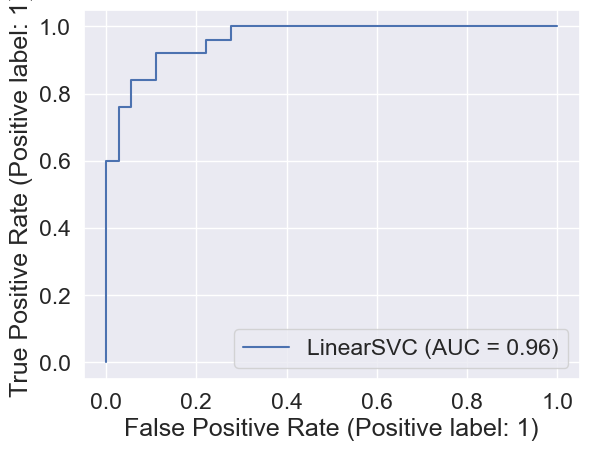

In [502]:
# from_estimator() = use a model to plot ROC curve on data
RocCurveDisplay.from_estimator(estimator=fin_model, 
                               X=X_test, 
                               y=y_test); 

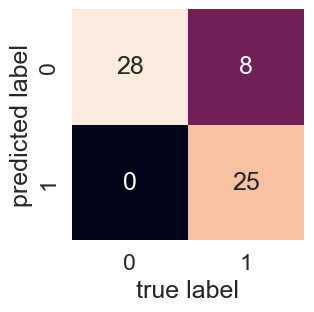

In [506]:

sns.set(font_scale=1.5) # Increase font size
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")

y_pred = fin_model.predict(X_test)
plot_conf_mat(y_test, y_preds = y_pred) # replace with y_fin once threshold tried 

In [504]:
clf = CalibratedClassifierCV(fin_model) 
clf.fit(X_train, y_train)
y_proba = clf.predict_proba(X_test)

In [441]:
X_test.loc[0, 'thalachh'] = 23

In [507]:
X_test

,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
297,0.625000,0.660377,0.114155,0.145038,0.161290,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
217,0.708333,0.339623,0.465753,0.465649,0.290323,1,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
283,0.229167,0.547170,0.221461,0.839695,0.000000,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
31,0.750000,0.245283,0.116438,0.526718,0.064516,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
222,0.750000,0.415094,0.356164,0.786260,0.225806,1,0,1,0,0,...,0,1,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.479167,0.292453,0.196347,0.740458,0.161290,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
188,0.437500,0.433962,0.244292,0.702290,0.096774,1,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
129,0.937500,0.245283,0.326484,0.381679,0.032258,0,1,1,0,0,...,0,0,0,0,0,0,1,0,1,0
49,0.500000,0.415094,0.246575,0.679389,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [508]:
joblib.dump(fin_model, 'fin_model.joblib')

['fin_model.joblib']

In [509]:
fin_model = joblib.load('fin_model.joblib')


In [510]:
fin_model

LinearSVC(C=1)

In [511]:
age_value = X_test.iloc[0, 0]

In [364]:
age_value

0.47916666666666663

In [622]:
.

In [615]:
import requests
import time

def get_data_from_json_link(json_link):
    try:
        response = requests.get(json_link)
        if response.status_code == 200:
            json_data = response.json()
            return json_data
        else:
            print(f"Error: Unable to fetch data. Status code: {response.status_code}")
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


import requests

def update_data_to_json_link(json_link, update_data):
    try:
        # Send a PUT request with JSON data
        response = requests.put(json_link, json=update_data)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            print("Data updated successfully!")
        else:
            print(f"Error: Unable to update data. Status code: {response.status_code}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Replace this URL with your actual JSON link
update_json_link = "https://blr1.blynk.cloud/external/api/get?token=ioBRI8I7FtCdrxMIEJfgdPrcSZMvEW_Y&v6"

# Data to be updated as JSON
data_to_update = {
    "name": "Updated Name",
    "age": 35,
    "gender": "Female"
}

# Call the function to update data
update_data_to_json_link(update_json_link, "Why did they steal my almonds")


# def categorize_restecg(ecg_value):
#     if ecg_value < 0 or ecg_value > 170:
#         return "Unknown category"
#     elif 0 <= ecg_value < 60:
#         return "Normal"
#     elif 60 <= ecg_value < 120:
#         return "ST-T wave normality"
#     elif ecg_value >= 120:
#         return "Left ventricular hypertrophy"
while True:
    json_link_pulse_rate = "https://blr1.blynk.cloud/external/api/get?token=ioBRI8I7FtCdrxMIEJfgdPrcSZMvEW_Y&v3"
    json_data_pulse_rate = get_data_from_json_link(json_link_pulse_rate)

    # if json_data:
    #     ecg_values = json_data.get('restecg', [])

    #     if ecg_values:
    #         print("Categorized ECG values:")
    #         for ecg_value in ecg_values:
    #             category = categorize_restecg(ecg_value)
    #             print(f"ECG Value: {ecg_value} -> Category: {category}")
    #     else:
    #         print("No ECG values found in the JSON data.")
    time.sleep(3)
    print(json_data_pulse_rate)


    

Error: Unable to update data. Status code: 404
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23


KeyboardInterrupt: 

In [370]:
json_data_pulse_rate

77

In [565]:
def update_data_to_json_link(url):
    try:
        # Send a PUT request with JSON data
        response = requests.get(url=url)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            print("Data updated successfully!")
        else:
            print(f"Error: Unable to update data. Status code: {response.status_code}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Data to be updated as JSON
update_data = 'System Down'

# Call the function to update data
update_data_to_json_link(url = f"https://blr1.blynk.cloud/external/api/update?token=ioBRI8I7FtCdrxMIEJfgdPrcSZMvEW_Y&v6={update_data}")

Data updated successfully!


In [512]:
def categorize_restecg(ecg_value):
    if ecg_value < 0 or ecg_value > 170:
        return "Unknown category"
    elif 0 <= ecg_value < 60:
        return 0
    elif 60 <= ecg_value < 120:
        return 1
    elif ecg_value >= 120:
        return 2

def final_func(pulse_rate, ecg):
    while True:
        json_link_age = "https://blr1.blynk.cloud/external/api/get?token=OA4pLmIVWF7qX-7B829cROh3qG4sLyFZ&v5"
        json_data_age = int(get_data_from_json_link(json_link_age)) # updated link

        json_link_sex = "https://blr1.blynk.cloud/external/api/get?token=OA4pLmIVWF7qX-7B829cROh3qG4sLyFZ&v7"
        json_data_sex = int(get_data_from_json_link(json_link_sex)) # updated value

        json_link_cp = "https://blr1.blynk.cloud/external/api/get?token=OA4pLmIVWF7qX-7B829cROh3qG4sLyFZ&v8"
        json_data_cp = int(get_data_from_json_link(json_link_cp)) # updated value

        json_link_trtbps = "https://blr1.blynk.cloud/external/api/get?token=OA4pLmIVWF7qX-7B829cROh3qG4sLyFZ&v16"
        json_data_trtbps = int(get_data_from_json_link(json_link_trtbps)) # updated value

        json_link_chol = "https://blr1.blynk.cloud/external/api/get?token=OA4pLmIVWF7qX-7B829cROh3qG4sLyFZ&v9"
        json_data_chol = int(get_data_from_json_link(json_link_chol)) # updated value

        json_link_fbs = "https://blr1.blynk.cloud/external/api/get?token=OA4pLmIVWF7qX-7B829cROh3qG4sLyFZ&v10"
        json_data_fbs = int(get_data_from_json_link(json_link_fbs)) #updated value

        json_link_restecg = "https://blr1.blynk.cloud/external/api/get?token=OA4pLmIVWF7qX-7B829cROh3qG4sLyFZ&v0"
        json_data_restecg = int(get_data_from_json_link(json_link_restecg)) # updated value 

        json_link_thalachh = "https://blr1.blynk.cloud/external/api/get?token=OA4pLmIVWF7qX-7B829cROh3qG4sLyFZ&v3"
        json_data_thalachh = int(get_data_from_json_link(json_link_thalachh)) # updated value
    

        json_link_exng = "https://blr1.blynk.cloud/external/api/get?token=OA4pLmIVWF7qX-7B829cROh3qG4sLyFZ&v15"
        json_data_exng = int(get_data_from_json_link(json_link_exng)) # updated value

        json_link_oldpeak = "https://blr1.blynk.cloud/external/api/get?token=OA4pLmIVWF7qX-7B829cROh3qG4sLyFZ&v11"
        json_data_oldpeak = float(get_data_from_json_link(json_link_oldpeak)) #updated value

        json_link_slp = "https://blr1.blynk.cloud/external/api/get?token=OA4pLmIVWF7qX-7B829cROh3qG4sLyFZ&v12"
        json_data_slp = int(get_data_from_json_link(json_link_slp)) # updated value

        json_link_caa = "https://blr1.blynk.cloud/external/api/get?token=OA4pLmIVWF7qX-7B829cROh3qG4sLyFZ&v13"
        json_data_caa = int(get_data_from_json_link(json_link_caa)) # update value



        
    
    
    
    

SyntaxError: invalid syntax (2617780161.py, line 54)

In [566]:

def categorize_restecg(ecg_value):
    if ecg_value < 0 or ecg_value > 170:
        return "Unknown category"
    elif 0 <= ecg_value < 60:
        return 0
    elif 60 <= ecg_value < 120:
        return 1
    elif ecg_value >= 120:
        return 2
        

In [632]:
def prevention_suite(trtbps, chol, thalachh):
    if chol > 500:
        return True
    elif trtbps > 200:
        return True
    elif thalachh > 190:
        return True
    else:
        return False

while True:

    time.sleep(2)
    json_link_age = "https://blr1.blynk.cloud/external/api/get?token=ioBRI8I7FtCdrxMIEJfgdPrcSZMvEW_Y&v5"
    json_data_age = int(get_data_from_json_link(json_link_age)) # updated link

    json_link_sex = "https://blr1.blynk.cloud/external/api/get?token=OA4pLmIVWF7qX-7B829cROh3qG4sLyFZ&v7"
    json_data_sex = int(get_data_from_json_link(json_link_sex)) # updated value

    json_link_cp = "https://blr1.blynk.cloud/external/api/get?token=OA4pLmIVWF7qX-7B829cROh3qG4sLyFZ&v8"
    json_data_cp = int(get_data_from_json_link(json_link_cp)) # updated value

    json_link_trtbps = "https://blr1.blynk.cloud/external/api/get?token=ioBRI8I7FtCdrxMIEJfgdPrcSZMvEW_Y&v16"
    json_data_trtbps = int(get_data_from_json_link(json_link_trtbps)) # updated value

    json_link_chol = "https://blr1.blynk.cloud/external/api/get?token=ioBRI8I7FtCdrxMIEJfgdPrcSZMvEW_Y&v9"
    json_data_chol = int(get_data_from_json_link(json_link_chol)) # updated value

    json_link_fbs = "https://blr1.blynk.cloud/external/api/get?token=OA4pLmIVWF7qX-7B829cROh3qG4sLyFZ&v10"
    json_data_fbs = int(get_data_from_json_link(json_link_fbs)) #updated value

    json_link_restecg = "https://blr1.blynk.cloud/external/api/get?token=OA4pLmIVWF7qX-7B829cROh3qG4sLyFZ&v0"
    json_data_restecg = int(get_data_from_json_link(json_link_restecg)) # updated value 


        
    json_data_restecg = categorize_restecg(json_data_restecg)
        


    json_link_thalachh = "https://blr1.blynk.cloud/external/api/get?token=ioBRI8I7FtCdrxMIEJfgdPrcSZMvEW_Y&v3"
    json_data_thalachh = int(get_data_from_json_link(json_link_thalachh)) # updated value


    json_link_exng = "https://blr1.blynk.cloud/external/api/get?token=OA4pLmIVWF7qX-7B829cROh3qG4sLyFZ&v15"
    json_data_exng = int(get_data_from_json_link(json_link_exng)) # updated value

    json_link_oldpeak = "https://blr1.blynk.cloud/external/api/get?token=OA4pLmIVWF7qX-7B829cROh3qG4sLyFZ&v11"
    json_data_oldpeak = float(get_data_from_json_link(json_link_oldpeak)) #updated value

    json_link_slp = "https://blr1.blynk.cloud/external/api/get?token=OA4pLmIVWF7qX-7B829cROh3qG4sLyFZ&v12"
    json_data_slp = int(get_data_from_json_link(json_link_slp)) # updated value

    json_link_caa = "https://blr1.blynk.cloud/external/api/get?token=OA4pLmIVWF7qX-7B829cROh3qG4sLyFZ&v13"
    json_data_caa = int(get_data_from_json_link(json_link_caa)) # update value

    json_link_thall = "https://blr1.blynk.cloud/external/api/get?token=OA4pLmIVWF7qX-7B829cROh3qG4sLyFZ&v14"
    json_data_thall = int(get_data_from_json_link(json_link_thall))





    X_final  = df.drop('output', axis = 1)
    alpha = 0

    # Get the index of the final row
    final_row_index = X_final.index[-1]

    # Add the list to the final row using loc
    X_final.loc[final_row_index + 1] = [json_data_age, json_data_sex, json_data_cp, json_data_trtbps, json_data_chol,json_data_fbs, json_data_restecg, json_data_thalachh, json_data_exng, json_data_oldpeak, json_data_slp, json_data_caa, json_data_thall]

    X_final = pd.get_dummies(X_final, columns = cat_cols, drop_first=True) # good idea to drop first because the number of columns is reduced

    scaler_mn = MinMaxScaler()

    X_final[con_cols] = scaler_mn.fit_transform(X_final[con_cols])

    column_list = X_final.columns
    new_column_list = []


    for column in column_list:
        if column.endswith('.0'):
            new_column_list.append(column[:-2])
        else:
            new_column_list.append(column)

    X_final.columns = new_column_list
    fin_model = joblib.load('fin_model.joblib')
    print(f'''
    Heart attack data successfully sent!
          
    ''')

    if prevention_suite(trtbps=json_data_trtbps, chol=json_data_chol, thalachh=json_data_thalachh) == True:
        response = 'You are heart attack positive'
    elif fin_model.predict(X_final)[0] == 1:
        response = 'You are heart attack negative'
    


    requests.get(url = f"https://blr1.blynk.cloud/external/api/update?token=ioBRI8I7FtCdrxMIEJfgdPrcSZMvEW_Y&v6={response}")



    Heart attack data successfully sent!
          
    

    Heart attack data successfully sent!
          
    

    Heart attack data successfully sent!
          
    

    Heart attack data successfully sent!
          
    

    Heart attack data successfully sent!
          
    

    Heart attack data successfully sent!
          
    

    Heart attack data successfully sent!
          
    


KeyboardInterrupt: 